Bio
Signal Analysis for
Smoking

Problem Statement
You are working as a data scientist in a
global
company . Over the years, the company has
collected details and gathered a lot of
information about individuals. The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio signals. Given a person s
information, build a machine learning model
that can classify the presence or absence of
smoking.

Dataset Information
This dataset is a collection of basic health biological signal
data which
contains around
55 K record with 27 attributes.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings  
warnings.filterwarnings('ignore') 

In [146]:
#load data

In [147]:
df=pd.read_csv('smoking.csv')

In [148]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [149]:
#EDA

In [150]:
df.shape

(55692, 27)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [152]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
#data cleaning 

In [153]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [154]:
df.corr()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
ID,1.000000,-0.000825,0.006306,0.004814,0.005384,0.009616,0.003088,0.002676,-0.004959,0.002489,...,-0.005464,0.001429,0.006464,0.000382,0.003830,-0.001865,-0.002803,0.000823,0.000641,0.011476
age,-0.000825,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,...,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.162557
height(cm),0.006306,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,...,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.396675
weight(kg),0.004814,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,...,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.302780
waist(cm),0.005384,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,...,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.226259
eyesight(left),0.009616,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,...,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.061204
eyesight(right),0.003088,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,...,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.063017
hearing(left),0.002676,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,...,-0.020159,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.023209
hearing(right),-0.004959,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,...,-0.017986,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.018855
systolic,0.002489,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,...,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.073109


In [155]:
#Data Visualization

<Axes: >

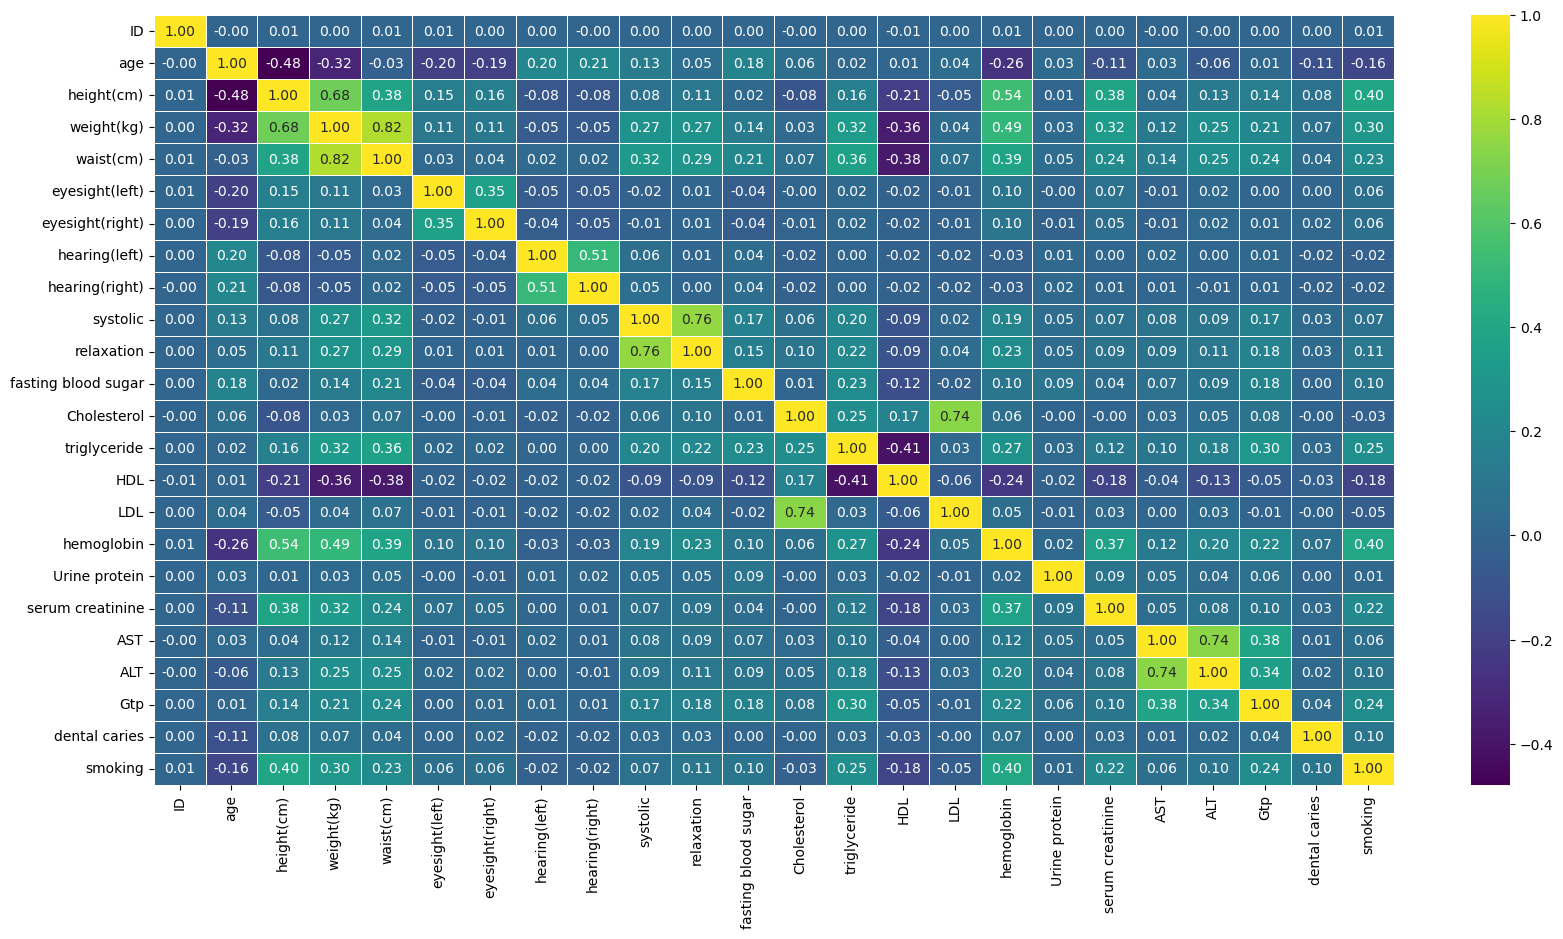

In [156]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), xticklabels='auto', yticklabels='auto', annot_kws=None, linewidths=0.5, 
            linecolor='white', cmap= 'viridis', fmt='.2f', annot=True, cbar=True)


<Axes: xlabel='gender', ylabel='smoking'>

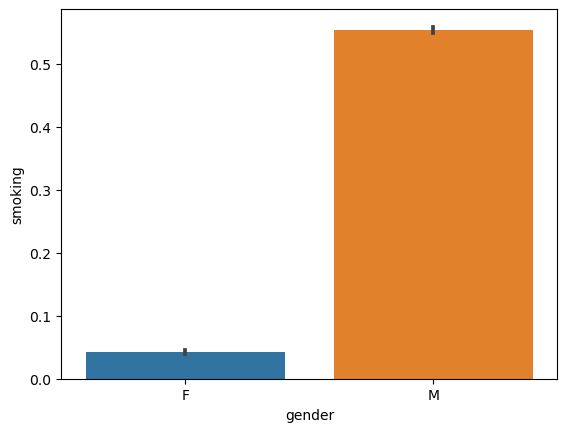

In [157]:
sns.barplot(x=df['gender'],y=df['smoking'])

<Axes: xlabel='gender', ylabel='count'>

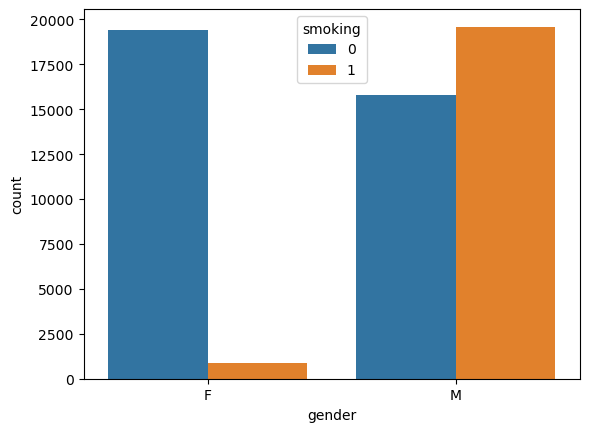

In [158]:
sns.countplot(x=df['gender'], hue= df['smoking'])

We can clearly see from the below graph that most smokers are men

<Axes: xlabel='age', ylabel='Count'>

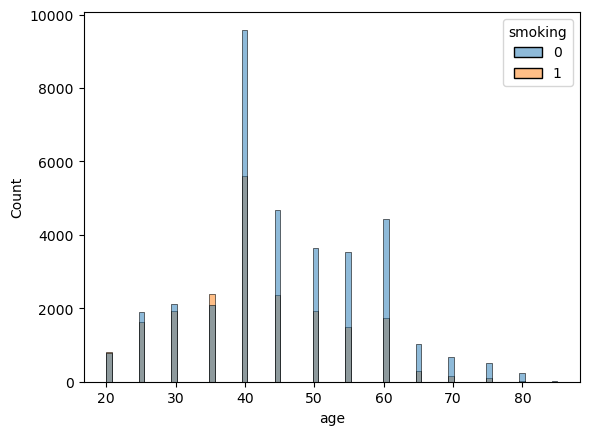

In [159]:
sns.histplot(hue=df['smoking'], x=df['age'])

Most number of smokers are having the age 40

<Axes: xlabel='age', ylabel='smoking'>

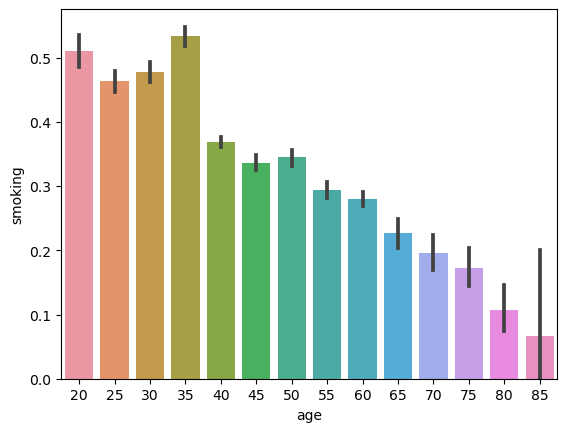

In [160]:
sns.barplot(y=df['smoking'], x=df['age'])

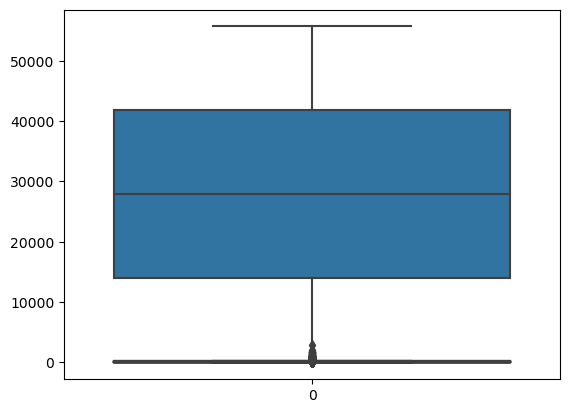

In [161]:
for i in df.columns:
    if (df[i].dtypes != 'object'):
        sns.boxplot(df[i])


Representation of columns using boxplot to detect outliers. Here
outliers represent natural
variations in the population , and they should be left as is in the dataset. These are called true
outliers . Therefore for this dataset we will not remove

<Axes: >

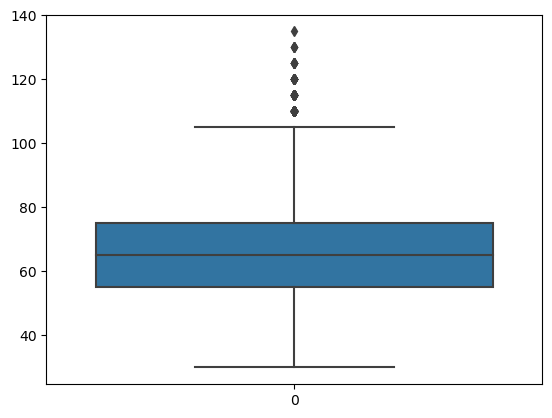

In [162]:
sns.boxplot(df['weight(kg)'])

In [163]:
#Data Cleaning 

In [164]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
for i in df.columns:
    if (df[i].dtypes == 'object'):
        df[i]=le.fit_transform(df[i])

In [166]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


Performing One Hot Encoding for categorical features of a dataframe

In [167]:
#Feature selection using feature importance

In [168]:
X=df.iloc[:,:-1]
X

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [169]:
y= pd.DataFrame(df['smoking'])
y

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
55687,0
55688,0
55689,0
55690,0


In [170]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(X,y)
df1=pd.Series(et.feature_importances_, index= X.columns)
df1

ID                     0.027353
gender                 0.191662
age                    0.043782
height(cm)             0.057121
weight(kg)             0.043516
waist(cm)              0.040265
eyesight(left)         0.033784
eyesight(right)        0.033437
hearing(left)          0.002733
hearing(right)         0.003097
systolic               0.036966
relaxation             0.036957
fasting blood sugar    0.037682
Cholesterol            0.036419
triglyceride           0.052152
HDL                    0.039304
LDL                    0.037373
hemoglobin             0.051388
Urine protein          0.009509
serum creatinine       0.038011
AST                    0.036554
ALT                    0.037427
Gtp                    0.055539
oral                   0.000000
dental caries          0.008707
tartar                 0.009262
dtype: float64

<Axes: >

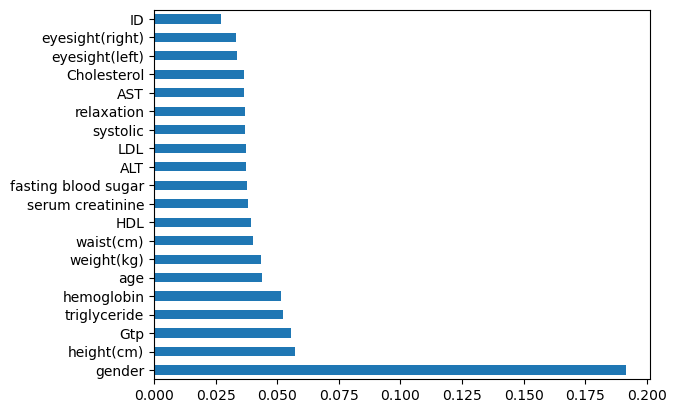

In [171]:
df1.nlargest(20).plot(kind= 'barh')


Feature importance is a technique that calculate a score for all the input features for a given model. So
out of 24 features we will select the top 15 features based on the score

In [172]:
X.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'],
      dtype='object')

In [173]:
X=df[['gender','height(cm)', 'Gtp', 'hemoglobin', 'triglyceride', 'age', 'weight(kg)', 'waist(cm)','HDL', 'LDL', 'systolic', 
   'fasting blood sugar','serum creatinine', 'relaxation', 'ALT']]

In [174]:
X

,gender,height(cm),Gtp,hemoglobin,triglyceride,age,weight(kg),waist(cm),HDL,LDL,systolic,fasting blood sugar,serum creatinine,relaxation,ALT
0,0,155,27.0,12.9,82.0,40,60,81.3,73.0,126.0,114.0,94.0,0.7,73.0,19.0
1,0,160,18.0,12.7,115.0,40,60,81.0,42.0,127.0,119.0,130.0,0.6,70.0,19.0
2,1,170,22.0,15.8,182.0,55,60,80.0,55.0,151.0,138.0,89.0,1.0,86.0,16.0
3,1,165,18.0,14.7,254.0,40,70,88.0,45.0,226.0,100.0,96.0,1.0,60.0,26.0
4,0,155,22.0,12.5,74.0,40,60,86.0,62.0,107.0,120.0,80.0,0.6,74.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,170,10.0,12.3,99.0,40,65,75.0,75.0,118.0,110.0,89.0,0.6,68.0,7.0
55688,0,160,14.0,14.0,69.0,45,50,70.0,73.0,79.0,101.0,89.0,0.9,62.0,12.0
55689,0,160,12.0,12.4,77.0,55,50,68.5,79.0,63.0,117.0,88.0,0.5,72.0,11.0
55690,1,165,18.0,14.4,79.0,60,60,78.0,48.0,146.0,133.0,107.0,0.7,76.0,19.0


In [175]:
y.shape

(55692, 1)

In [176]:
#feature selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=29)

In [177]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)


### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predlr=lr.predict(X_test)
y_predlr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [179]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38984, 15) (16708, 15) (38984, 1) (16708, 1)


In [180]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test, y_predlr)

0.7271367009815657

In [181]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predlr)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     10581
           1       0.61      0.70      0.65      6127

    accuracy                           0.73     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.74      0.73      0.73     16708



### Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preddt= dt.predict(X_test)
y_preddt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [183]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test, y_preddt)


0.7732224084271008

In [184]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_preddt)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10581
           1       0.69      0.70      0.69      6127

    accuracy                           0.77     16708
   macro avg       0.76      0.76      0.76     16708
weighted avg       0.77      0.77      0.77     16708



### Bagging Algorithm-Bagging Classifier

In [192]:
from sklearn.ensemble import BaggingClassifier 
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bg.fit(X_train,y_train).score(X_test,y_test)
y_predbg= bg.predict(X_test)
y_predbg

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [193]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test, y_predbg)


0.8197869284175245

In [194]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predbg)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     10581
           1       0.74      0.78      0.76      6127

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708



### Bagging Algorithm -Extra Trees

In [186]:
from sklearn.ensemble import ExtraTreesClassifier 
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train,y_train)
y_predet= et.predict(X_test)
y_predet

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [187]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test, y_predet)


0.8184103423509695

In [188]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predet)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10581
           1       0.73      0.79      0.76      6127

    accuracy                           0.82     16708
   macro avg       0.80      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708



### Bagging Algorithm -Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_predrf = rf.predict(X_test)

In [190]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test, y_predrf)


0.8242757960258559

In [191]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predrf)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10581
           1       0.75      0.79      0.77      6127

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.83     16708



### Final output:
    

Based on the result, bagging algorithm random forest has given higher accuracy of 82% showing the model to predict smoking or not. 